# Project 2: investigate a dataset

## 0. Question formulation

The question that this analysis is trying to answer is: what factors made people more likely to survive? To be more specific, following three factors will be investigated.
* `Sex`: ladies first, therefore female might be prioritized when getting on lifeboats, and hence having larger chance of surviving.
* `Age`: the hypothesis is that young adults (age between 20 and 39 years old) is more likely to survive, because they have better physical power to survive in the freezing weather.
* `SibSp`: people having siblings or spouse could help each other. This increases their chance of surviving.

## 1. Data import

In [7]:
import pandas as pd
import numpy as np
import csv

data_file = "./titanic_data.csv"
titanic_data = pd.read_csv(data_file)

# show first 5 rows of titanic data
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# look at data types of each column
print titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


## 2. Data cleaning
The code section below plots for each column, whether there are missing values or not. From the result it can be seen that columns `'Age'` and `'Cabin'` have a lot of missing values. `'Cabin'` is not in the factors to be analyzed. Therefore rows with missing `'Age'` values will be filtered out.

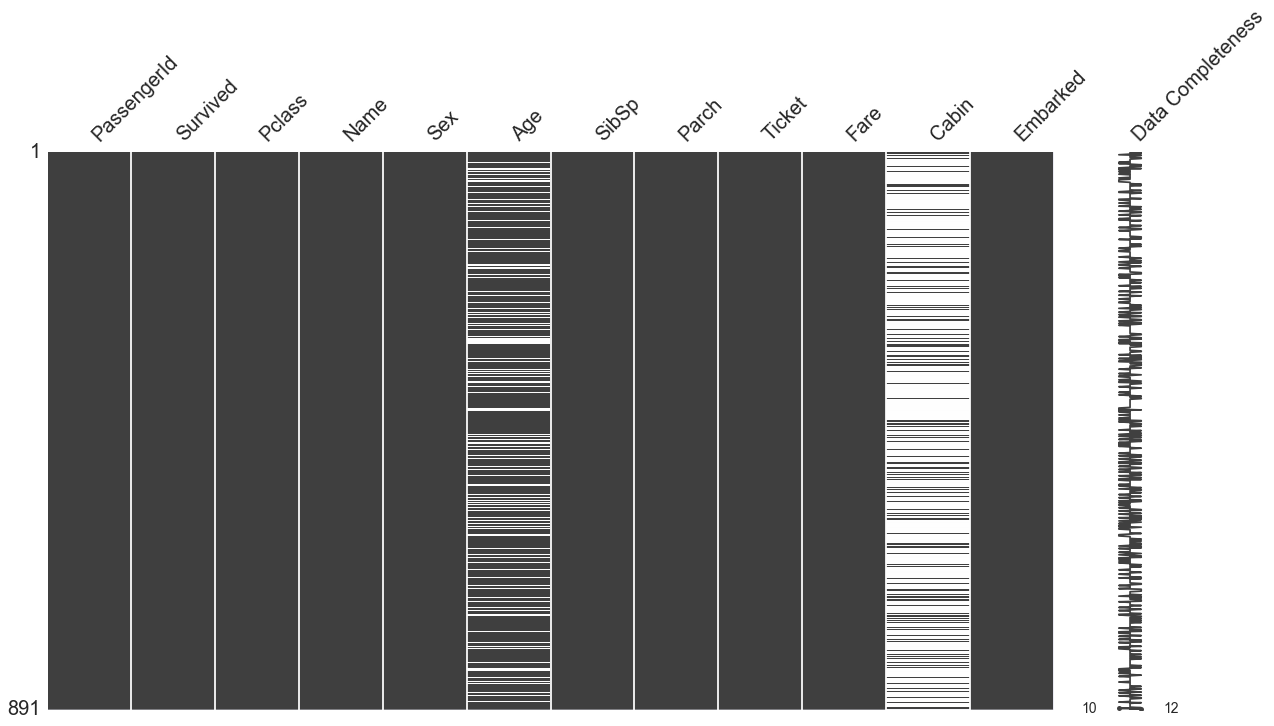

In [9]:
%matplotlib inline
import missingno as msno

missing_data_plot = msno.matrix(titanic_data)
titanic_data = titanic_data[titanic_data.Age.notnull()]

## 3. Data transformation
The data types of column `'Sex'` and `'Embarked'` are categorical with string values. However, when trying to find correlations between these columns and the column `'Survived'`, they must be numerical. Therefore, the decision is to convert those categorical columns to integers.  
* `Sex: 0 for male, 1 for female`  
* `Embarked: according to the order of cities for embarking, 1 for S, 2 for C, 3 for Q`

In [10]:
def sex_cat_to_num(sex):
    num_value = None
    if sex == "male":
        num_value = 0
    elif sex == "female":
        num_value = 1
    return num_value

def embarked_cat_to_num(embarked):
    num_value = None
    if embarked == "S":
        num_value = 1
    elif embarked == "C":
        num_value = 2
    elif embarked == "Q":
        num_value = 3
    return num_value

titanic_data['Sex'] = titanic_data['Sex'].apply(sex_cat_to_num)
titanic_data['Embarked'] = titanic_data['Embarked'].apply(embarked_cat_to_num)
titanic_data.head(5)  # look at first 5 rows to check if functions are applied successfully

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0


## 4. Data analysis
In this section, we will look at `'Sex'`, `'Age'`, `'Embarked'` to see which of these factors contribute to the survival of Titanic passengers.
### 4.1 Sex vs. Survived
* H0: Sex and whether the passenger survived (Survived) or not is independent from each other
* H1: Sex and Survived are not independent
First take a look at how gender is distributed across all passengers:

In [11]:
group_by_sex = titanic_data.groupby(by = 'Sex').size()
print group_by_sex

Sex
0    453
1    261
dtype: int64


If Sex and Survived are independent of each other, then the statistics should look like following:
<table>
    <thead>
        <tr>
            <th>Sex</th>
            <th>Survived</th>
            <th>Count</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Male</td>
            <td>Not survived</td>
            <td>276</td>
        </tr>
        <tr>
          <td>Male</td>
          <td>Survived</td>
          <td>277</td>
        </tr>
        <tr>
          <td>Female</td>
          <td>Not survived</td>
          <td>130</td>
        </tr>
        <tr>
          <td>Female</td>
          <td>Survived</td>
          <td>131</td>
        </tr>
    </tbody>
</table>
When looking at the data, the actual distribution is as following.

In [12]:
group_by_sex_suv = titanic_data.groupby(by = ['Sex', 'Survived']).size()
print group_by_sex_suv

Sex  Survived
0    0           360
     1            93
1    0            64
     1           197
dtype: int64


It can be seen that there is a big difference than we expected. To see if these two variables are independent or not, a Chi-squared test is performed.

In [14]:
from scipy.stats import chisquare
chisquare(group_by_sex_suv, axis=None)

Power_divergenceResult(statistic=300.86834733893562, pvalue=6.4540620897174556e-65)

The resulting p-value is close to 0, therefore null hypotheis is rejected. There is indeed correlation between gender and passengers' survival.

### 4.2 Age vs. Survived
Here the question is: how many people in each age group survived? Are young adutls having higher percentage of survival than other age groups? Following age groups are defined:
* 0~19: babies and teenagers ('t')
* 20~39: young adults ('y')
* 40~59: middle aged adults ('m')
* 60 and 60+: senior people ('s')

In [15]:
def get_age_group(age):
    group = None
    if age >=0 and age <= 19:
        group = 't'
    elif age >= 20 and age <= 39:
        group = 'y'
    elif age >= 40 and age <= 59:
        group = 'm'
    else:
        group = 's'
    return group

titanic_data['AgeGroup'] = titanic_data['Age'].apply(get_age_group)

In [77]:
group_by_age = titanic_data.groupby(['AgeGroup', 'Survived'], as_index = False).count()
group_by_age = group_by_age[['AgeGroup', 'Survived', 'PassengerId']]
group_by_age.columns = ['AgeGroup', 'Survived', 'Count']
print group_by_age

  AgeGroup  Survived  Count
0        m         0     83
1        m         1     54
2        s         0     19
3        s         1      7
4        t         0     85
5        t         1     79
6        y         0    237
7        y         1    150


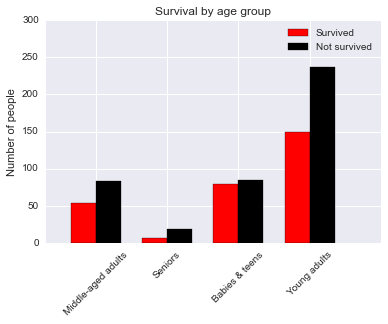

In [82]:
import numpy as np
import matplotlib.pyplot as plt

survived = group_by_age[group_by_age['Survived']==1]['Count']
not_survived = group_by_age[group_by_age['Survived']==0]['Count']

fig = plt.figure()
ax = fig.add_subplot(111)

## necessary variables
ind = np.arange(len(survived))                # the x locations for the groups
width = 0.35                      # the width of the bars

## the bars
rects1 = ax.bar(ind, survived, width, color='red')
rects2 = ax.bar(ind+width, not_survived, width, color='black')

# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,300)
ax.set_ylabel('Number of people')
ax.set_title('Survival by age group')
xTickMarks = ['Middle-aged adults', 'Seniors', 'Babies & teens', 'Young adults']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)

## add a legend
ax.legend( (rects1[0], rects2[0]), ('Survived', 'Not survived') )
plt.show()